# Hochschule Bonn-Rhein-Sieg

# Neural Networks, WS17/18

# Assignment 07 (20-November-2017)

##  Debaraj Barua, Naresh Kumar Gurulingan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
from sklearn import svm
from sklearn.metrics import accuracy_score

---
## Question 1:

1) Read chapter 6 from Haykin’s book (2nd edition). Summarize or sketch your insights in mind-map or an outline or a summary.

---
## Question 2:

2) The graphs on the Figure1.pdf (see Instruction Files) represent three different one-dimensional classification (dichotomization) tasks (along a sketched x-axis, dash means “no data point”). 

What is the lowest-order polynomial decision function that can correctly classify the given data? Black dots denote class 1 with target function value y1 = +1 and white dots depict class 2 with targets y2 = -1. What are the decision boundaries? 

If you wanted to classify the data sets (a), (b), (c) using SVM’s with Gaussian basis functions, how many hidden layer neurons would you need for each problem? 

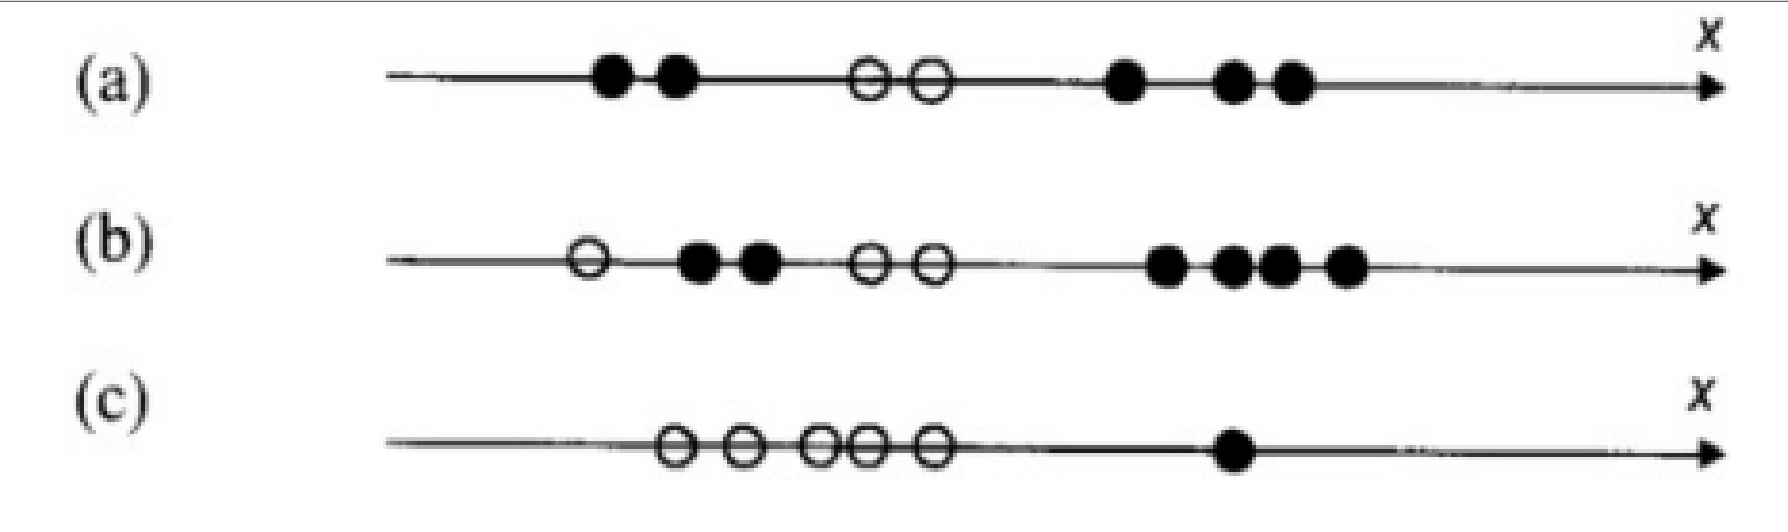

In [173]:
IPython.display.Image('images/Figure1.png', embed= True, width= 800 )

---
## Question 3:

3) For this exercise you can either use existing SVN-libraries (for example LIVSVM) or implement it youeself.

The image in the Figure2.pdf shows a pair of “moons” facing each other in an asymmetrically arranged manner. The moon labeled “Region A” is positioned symmetrically with respect to the y-axis, whereas the moon labeled “Region B” is displaced to the right of the y-axis by an amount equal to the radius r and below the x-axis by the distance d. The two moons have identical parameters: 

Radius of each moon, r = 10, 

Width of each moon, w = 6. 

The vertical distance d separating the two moons is adjustable; it is measured with respect to the x-axis, as indicated in the figure 

* Increasingly positive values of d signify increased separation between the two moons; 

* Increasingly negative values of d signify the two moons’ coming closer to each other. 

The training sample consists of 1000 pairs of data points, with each pair consisting of one point picked from region A and another point picked from region B, both randomly. The test sample consists of 3,000 pairs of data points, again picked in a random manner. 

Tasks: 

Your task is to classify the dataset using SVM (Support Vector Machine) for some cases given below. Generate the dataset for each case and classify using different kernels (e.g. linear, polynomial, radial basis etc.) Show the decision boundary (Plotting the classified points using different color will be enough) 

* Case 1: d = 0 

* Case 2: |d| = 1/2 * (radius of moon’s inner half-circle) and d is negative i.e. d is in the upper side of x-axis. 

* Case 3: Increase d negatively such that both of the moons touch each other. 

* Case 4: Both moons overlap each other 

* Case 5: Add some noise in the training set 

Try to experiment with different options in svmtrain (LIBSVM). Comment on your findings. 

This experiment is taken from Haykin’s book (3rd edition) which is introduced in the first chapter and continued throughout the book (chapter 2, 3, 4). For intuition, you can take a look in it.

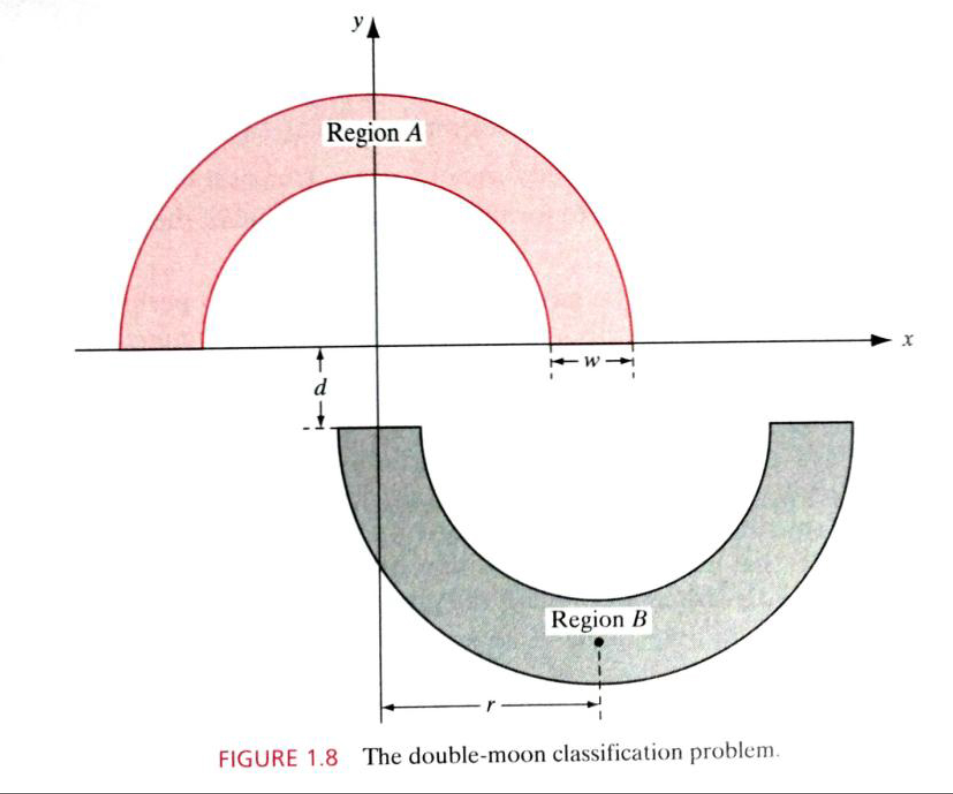

In [174]:
IPython.display.Image('images/Figure2.png', embed= True, width= 700 )

In [68]:
RADIUS = 10
WIDTH = 6

R_INNER = RADIUS - WIDTH/2
R_OUTER = RADIUS + WIDTH/2
THETA = np.linspace(0, 2*np.pi, 200)

def generate_points(d, size= None):
    """
        This function generates random points from
        the moons...
    """
    np.random.seed(0)
    r = np.random.uniform(R_INNER, R_OUTER, size= size)
    theta = np.random.uniform(0, 2*np.pi, size= size)
    x = r * np.cos(theta)
    y = np.abs(r * np.sin(theta))
    
    red_moon = np.array([x, y]).T
    black_moon = np.array([x + RADIUS, -y - d]).T
    
    red_moon = np.insert(red_moon, 2, 1, axis= 1)
    black_moon = np.insert(black_moon, 2, 0, axis= 1)
    
    return np.vstack((red_moon, black_moon))

In [69]:
def check_points(d, train_data, test_data, title= None):
    """
        This function can be used to check
        whether the generated points are right...
    """
    x_red_inner = R_INNER * np.cos(THETA)
    y_red_inner = np.abs(R_INNER * np.sin(THETA))
    x_red_outer = R_OUTER * np.cos(THETA)
    y_red_outer = np.abs(R_OUTER * np.sin(THETA))

    x_black_inner = x_red_inner + RADIUS
    y_black_inner = -y_red_inner - d
    x_black_outer = x_red_outer + RADIUS
    y_black_outer = -y_red_outer - d
    
    fig = plt.figure(figsize=(8,3))
    
    fig.add_subplot(1, 2, 1)
    plt.title('Training points visualized')
    plt.plot([0, 0], [-15, 15], color= 'k', linewidth= 3)
    plt.plot([-15, 15], [0, 0], color= 'k', linewidth= 3)
    plt.plot(x_red_inner, y_red_inner, color= 'r', linewidth= 3)
    plt.plot(x_red_outer, y_red_outer, color= 'r', linewidth= 3)
    plt.plot(x_black_inner, y_black_inner, color= 'k', linewidth= 3)
    plt.plot(x_black_outer, y_black_outer, color= 'k', linewidth= 3)
    plt.scatter(train_data[:,0], train_data[:,1], c= train_data[:,2], 
                cmap=plt.cm.Paired)
    
    fig.add_subplot(1, 2, 2)
    plt.title('Test points visualized')
    plt.plot([0, 0], [-15, 15], color= 'k', linewidth= 3)
    plt.plot([-15, 15], [0, 0], color= 'k', linewidth= 3)
    plt.plot(x_red_inner, y_red_inner, color= 'r', linewidth= 3)
    plt.plot(x_red_outer, y_red_outer, color= 'r', linewidth= 3)
    plt.plot(x_black_inner, y_black_inner, color= 'k', linewidth= 3)
    plt.plot(x_black_outer, y_black_outer, color= 'k', linewidth= 3)
    plt.scatter(test_data[:,0], test_data[:,1], c= test_data[:,2], 
                cmap=plt.cm.Paired)
    plt.show()

In [146]:
def plot_decision_boundry(data):
    # http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
    plt.scatter(data[:, 0], data[:, 1], c=data[:,-1:], s=30, 
                cmap=plt.cm.coolwarm)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
           linewidth=0.5, facecolors='g', label= 'Support Vectors')
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

### Case 1:  d = 0

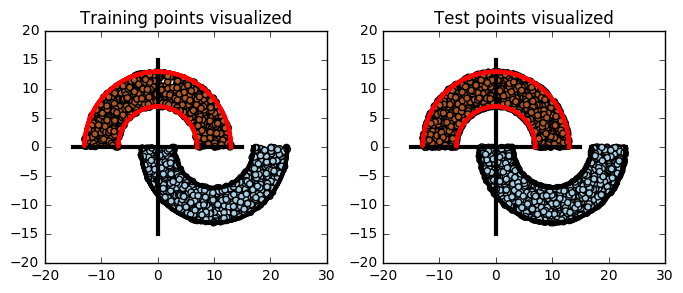

In [148]:
train_data = generate_points(0, size= 1000)
test_data = generate_points(0, size= 3000)
check_points(0, train_data, test_data)

### Linear kernel:

accuracy is:  0.9975


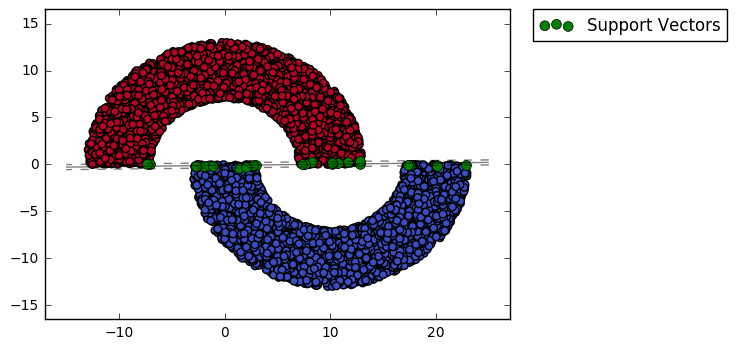

In [149]:
clf = svm.SVC(kernel= 'linear')
clf.fit(train_data[:,:-1], train_data[:,-1:])

prediction = clf.predict(test_data[:,:-1])
accuracy = accuracy_score(test_data[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data)

### Polynomial kernel:

accuracy is:  0.999333333333


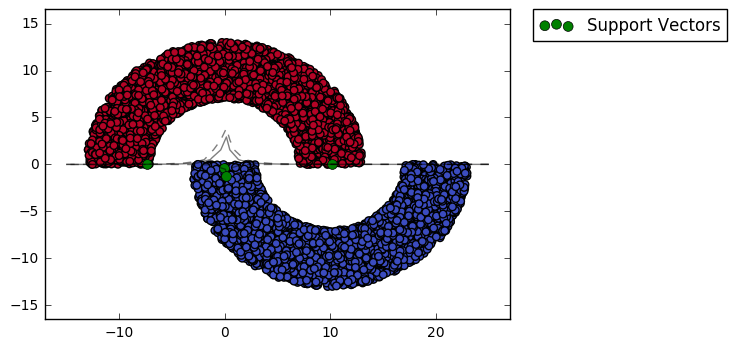

In [150]:
clf = svm.SVC(kernel= 'poly')
clf.fit(train_data[:,:-1], train_data[:,-1:])

prediction = clf.predict(test_data[:,:-1])
accuracy = accuracy_score(test_data[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data)

### Radial Basis Function kernel:

accuracy is:  1.0


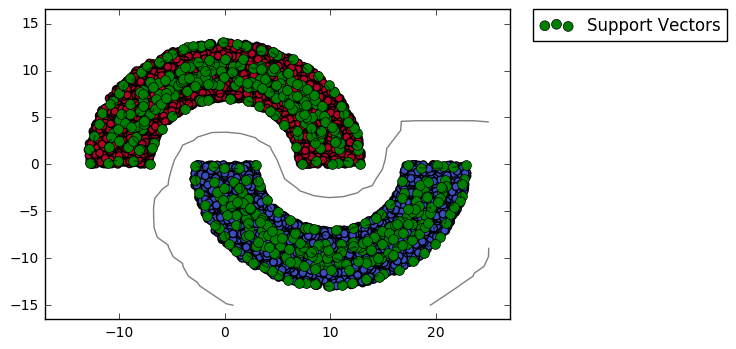

In [151]:
clf = svm.SVC(kernel= 'rbf')
clf.fit(train_data[:,:-1], train_data[:,-1:])

prediction = clf.predict(test_data[:,:-1])
accuracy = accuracy_score(test_data[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data)

### Sigmoid kernel:

accuracy is:  0.821333333333


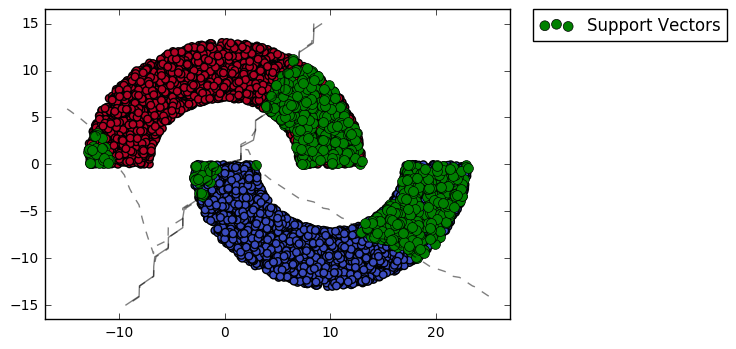

In [152]:
clf = svm.SVC(kernel= 'sigmoid')
clf.fit(train_data[:,:-1], train_data[:,-1:])

prediction = clf.predict(test_data[:,:-1])
accuracy = accuracy_score(test_data[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data)

### Case 2:  |d| = 1/2 * (radius of moon’s inner half-circle) and d is negative i.e. d is in the upper side of x-axis.

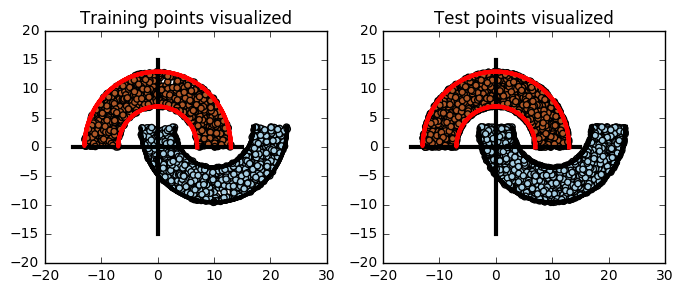

In [153]:
train_data_2 = generate_points(-0.5 * (R_INNER), size= 1000)
test_data_2 = generate_points(-0.5 * (R_INNER), size= 3000)
check_points(-0.5 * (R_INNER), train_data_2, test_data_2)

### Linear kernel:

accuracy is:  0.9225


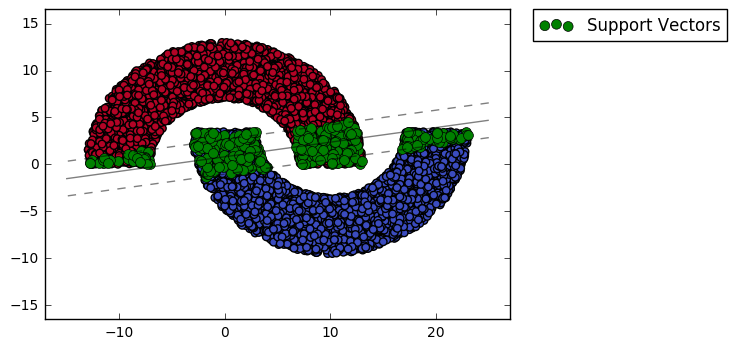

In [154]:
clf = svm.SVC(kernel= 'linear')
clf.fit(train_data_2[:,:-1], train_data_2[:,-1:])

prediction = clf.predict(test_data_2[:,:-1])
accuracy = accuracy_score(test_data_2[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_2)

### Polynomial kernel:

accuracy is:  0.961


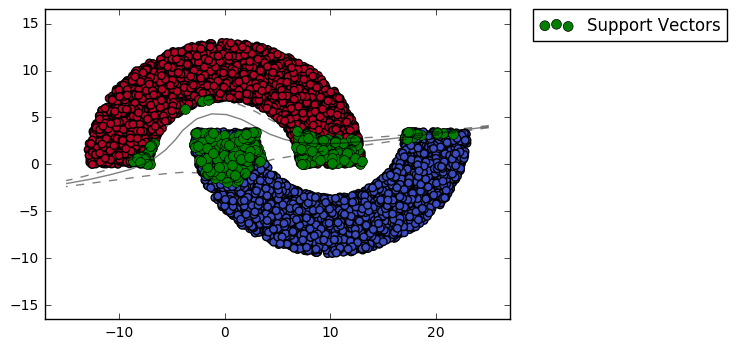

In [155]:
clf = svm.SVC(kernel= 'poly')
clf.fit(train_data_2[:,:-1], train_data_2[:,-1:])

prediction = clf.predict(test_data_2[:,:-1])
accuracy = accuracy_score(test_data_2[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_2)

### Radial Basis Function kernel:

accuracy is:  1.0


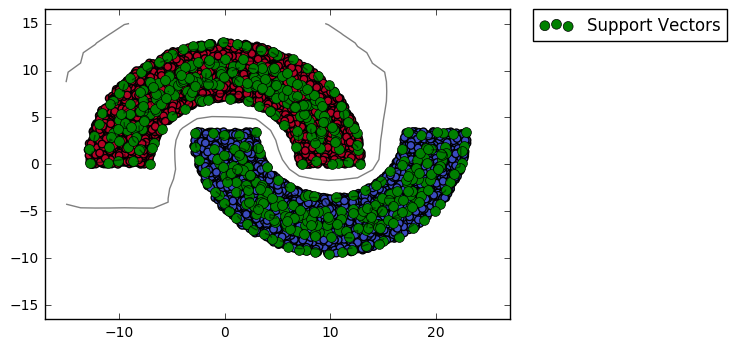

In [156]:
clf = svm.SVC(kernel= 'rbf')
clf.fit(train_data_2[:,:-1], train_data_2[:,-1:])

prediction = clf.predict(test_data_2[:,:-1])
accuracy = accuracy_score(test_data_2[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_2)

### Sigmoid kernel:

accuracy is:  0.718333333333


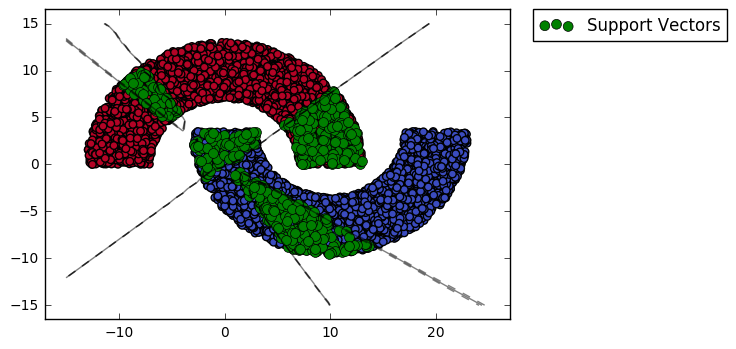

In [157]:
clf = svm.SVC(kernel= 'sigmoid')
clf.fit(train_data_2[:,:-1], train_data_2[:,-1:])

prediction = clf.predict(test_data_2[:,:-1])
accuracy = accuracy_score(test_data_2[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_2)

## Case 3: Increase d negatively such that both of the moons touch each other.

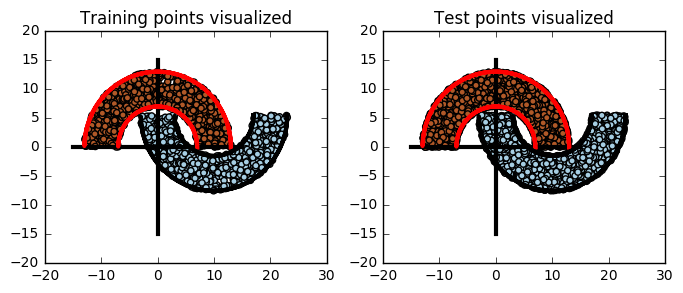

In [158]:
train_data_3 = generate_points(-5.5, size= 1000)
test_data_3 = generate_points(-5.5, size= 3000)
check_points(-5.5, train_data_3, test_data_3)

### Linear Kernel:

accuracy is:  0.873666666667


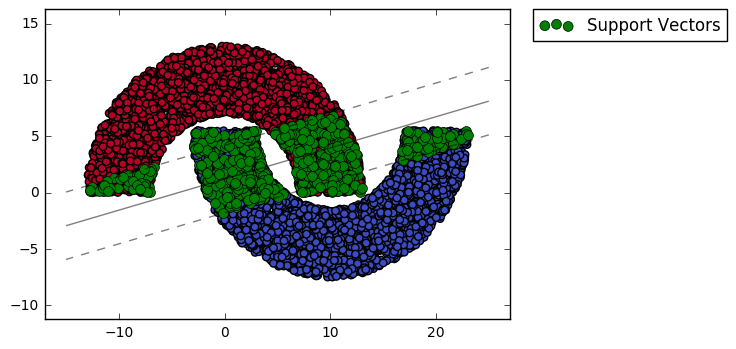

In [159]:
clf = svm.SVC(kernel= 'linear')
clf.fit(train_data_3[:,:-1], train_data_3[:,-1:])

prediction = clf.predict(test_data_3[:,:-1])
accuracy = accuracy_score(test_data_3[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_3)

### Polynomial Kernel:

accuracy is:  0.934166666667


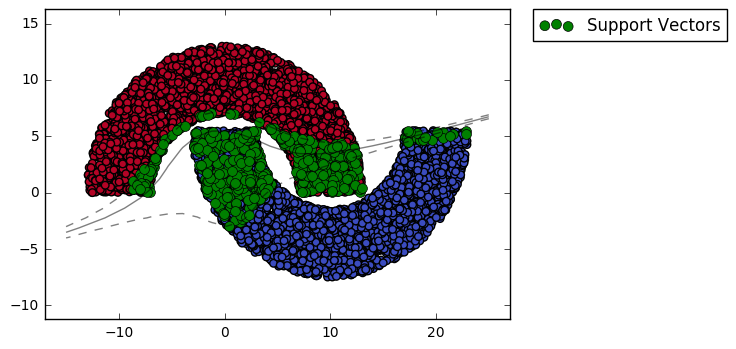

In [160]:
clf = svm.SVC(kernel= 'poly')
clf.fit(train_data_3[:,:-1], train_data_3[:,-1:])

prediction = clf.predict(test_data_3[:,:-1])
accuracy = accuracy_score(test_data_3[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_3)

### Radial Basis Function Kernel:

accuracy is:  1.0


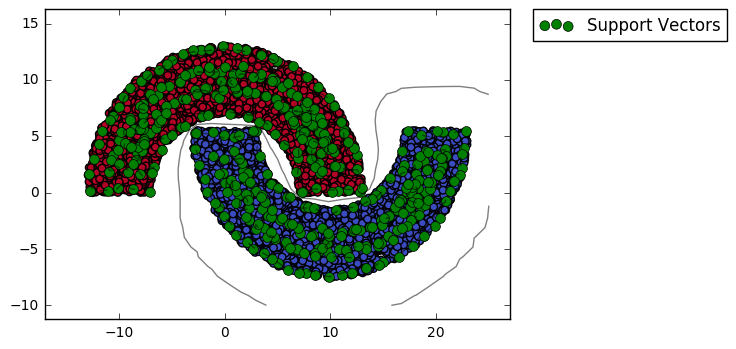

In [161]:
clf = svm.SVC(kernel= 'rbf')
clf.fit(train_data_3[:,:-1], train_data_3[:,-1:])

prediction = clf.predict(test_data_3[:,:-1])
accuracy = accuracy_score(test_data_3[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_3)

### Sigmoid Kernel:

accuracy is:  0.5975


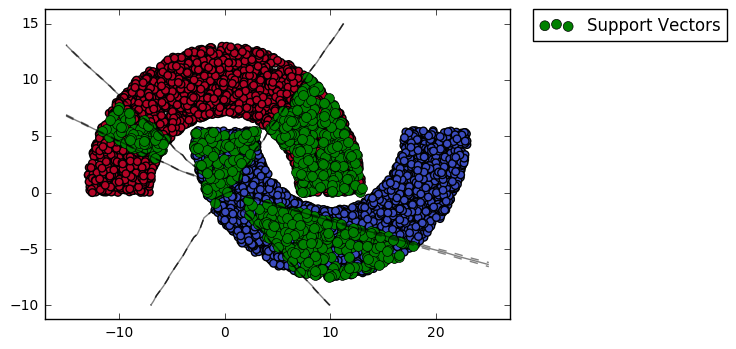

In [162]:
clf = svm.SVC(kernel= 'sigmoid')
clf.fit(train_data_3[:,:-1], train_data_3[:,-1:])

prediction = clf.predict(test_data_3[:,:-1])
accuracy = accuracy_score(test_data_3[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_3)

##  Case 4: Both moons overlap each other

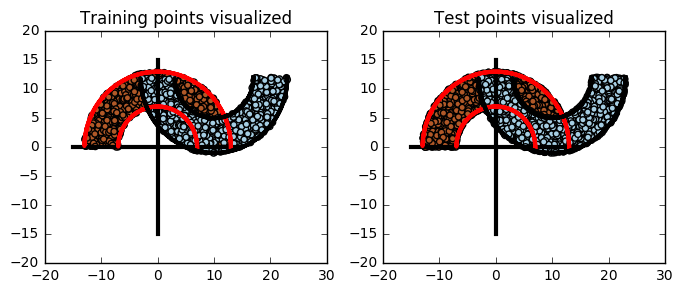

In [163]:
train_data_4 = generate_points(-12, size= 1000)
test_data_4 = generate_points(-12, size= 3000)
check_points(-12, train_data_4, test_data_4)

### Linear Kernel:

accuracy is:  0.727333333333


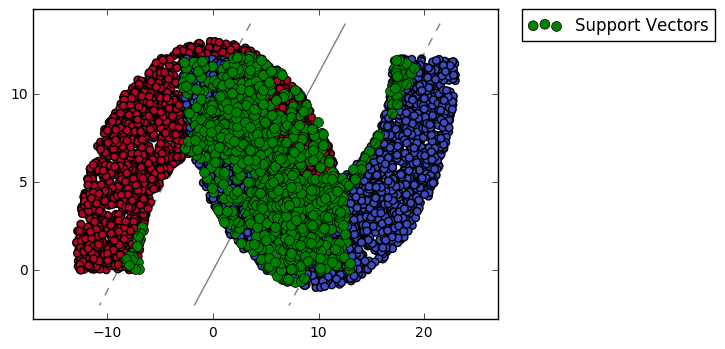

In [164]:
clf = svm.SVC(kernel= 'linear')
clf.fit(train_data_4[:,:-1], train_data_4[:,-1:])

prediction = clf.predict(test_data_4[:,:-1])
accuracy = accuracy_score(test_data_4[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_4)

### Polynomial Kernel:

accuracy is:  0.720666666667


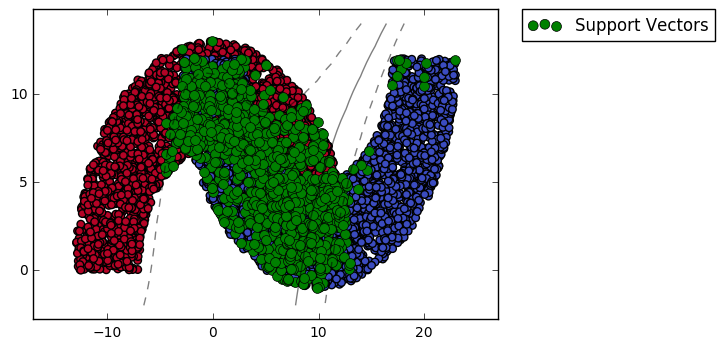

In [165]:
clf = svm.SVC(kernel= 'poly')
clf.fit(train_data_4[:,:-1], train_data_4[:,-1:])

prediction = clf.predict(test_data_4[:,:-1])
accuracy = accuracy_score(test_data_4[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_4)

### Radial Basis Function Kernel:

accuracy is:  0.812833333333


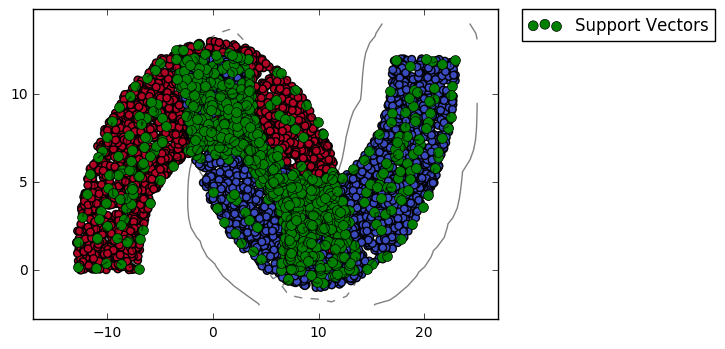

In [166]:
clf = svm.SVC(kernel= 'rbf')
clf.fit(train_data_4[:,:-1], train_data_4[:,-1:])

prediction = clf.predict(test_data_4[:,:-1])
accuracy = accuracy_score(test_data_4[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_4)

### Sigmoid Kernel:

accuracy is:  0.618666666667


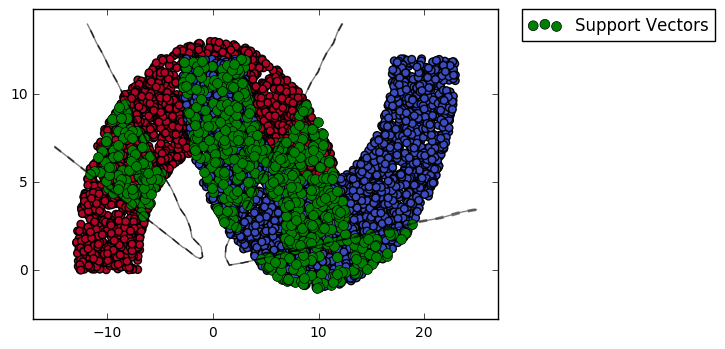

In [167]:
clf = svm.SVC(kernel= 'sigmoid')
clf.fit(train_data_4[:,:-1], train_data_4[:,-1:])

prediction = clf.predict(test_data_4[:,:-1])
accuracy = accuracy_score(test_data_4[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_4)

##  Case 5: Add some noise in the training set

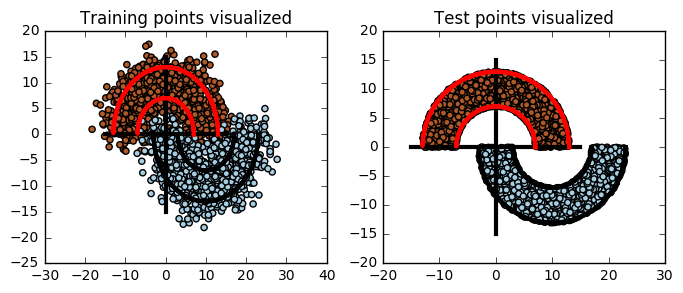

In [168]:
train_data_5 = generate_points(0, size= 1000)
# adding noise...
train_data_5[:,0:2] = train_data_5[:,0:2] + np.random.normal(
    0, 2.5, size= train_data_5[:,0:2].shape)

test_data_5 = generate_points(0, size= 3000)
check_points(0, train_data_5, test_data_5)

### Linear Kernel:

accuracy is:  0.977


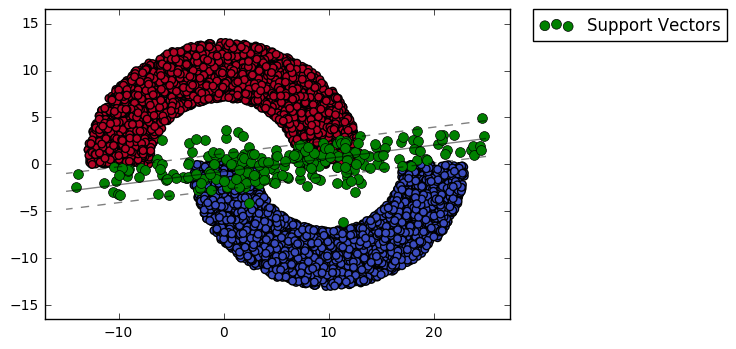

In [169]:
clf = svm.SVC(kernel= 'linear')
clf.fit(train_data_5[:,:-1], train_data_5[:,-1:])

prediction = clf.predict(test_data_5[:,:-1])
accuracy = accuracy_score(test_data_5[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_5)

### Polynomial Kernel:

accuracy is:  0.958166666667


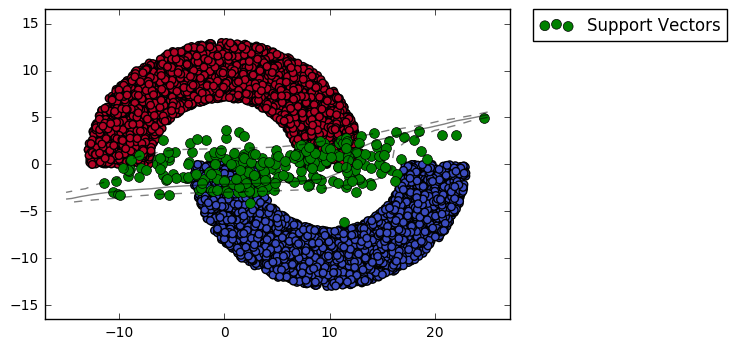

In [170]:
clf = svm.SVC(kernel= 'poly')
clf.fit(train_data_5[:,:-1], train_data_5[:,-1:])

prediction = clf.predict(test_data_5[:,:-1])
accuracy = accuracy_score(test_data_5[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_5)

### Radial Basis Function Kernel:

accuracy is:  0.999833333333


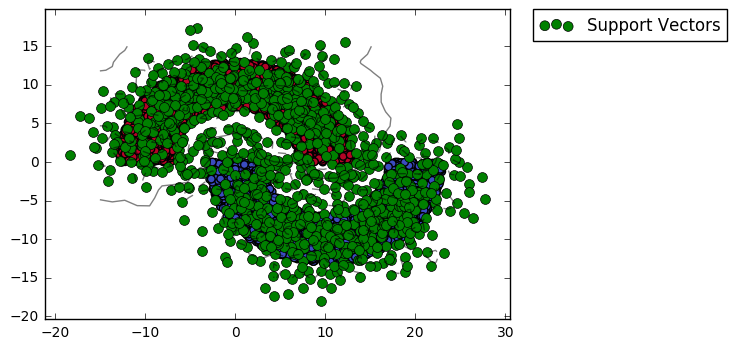

In [171]:
clf = svm.SVC(kernel= 'rbf')
clf.fit(train_data_5[:,:-1], train_data_5[:,-1:])

prediction = clf.predict(test_data_5[:,:-1])
accuracy = accuracy_score(test_data_5[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_5)

### Sigmoid Kernel:

accuracy is:  0.730833333333


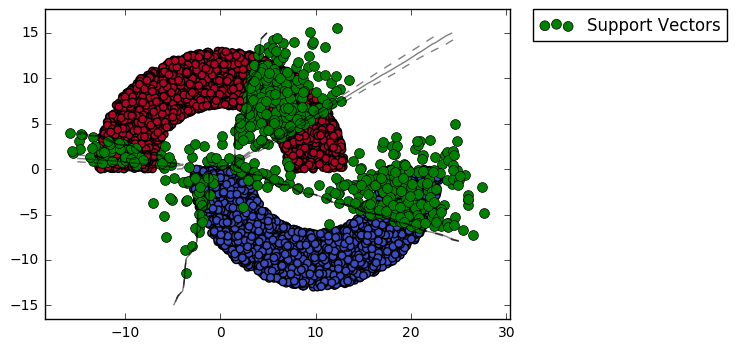

In [172]:
clf = svm.SVC(kernel= 'sigmoid')
clf.fit(train_data_5[:,:-1], train_data_5[:,-1:])

prediction = clf.predict(test_data_5[:,:-1])
accuracy = accuracy_score(test_data_5[:,-1:], prediction)
print 'accuracy is: ', accuracy

plot_decision_boundry(test_data_5)